In [1]:
import shap
import qiime2
from sklearn.pipeline import Pipeline
import pandas as pd
import biom
%matplotlib inline
shap.initjs()
import matplotlib.pyplot as plt

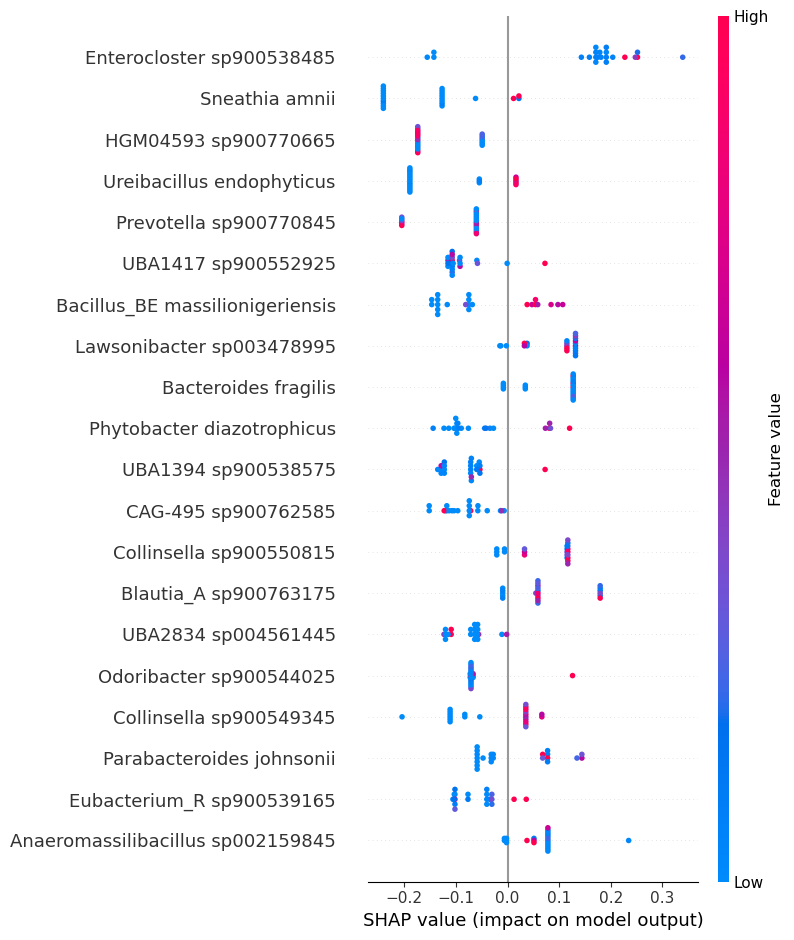

In [2]:
#5. Franzosa2019 -- Crohn’s Disease (IBD-CD)
fname = '../../../snakemake/data/Franzosa2019IBD/classify/GB-pictures-classifier_CD_no_feature_selection/probabilities.qza'
pred_probs = qiime2.Artifact.load(fname).view(pd.DataFrame)

fname = '../../../snakemake/data/Franzosa2019IBD/classify/GB-pictures-classifier_CD_no_feature_selection/feature_importance.qza'
feature_importances = qiime2.Artifact.load(fname).view(pd.DataFrame)

fname = '../../../snakemake/data/Franzosa2019IBD/Franzosa2019CD_filtered.biom'
table = biom.load_table(fname).to_dataframe().T
X_test = table.loc[pred_probs.index, feature_importances.index]

fname = '../../../snakemake/data/Franzosa2019IBD/Metadata_CD_matched.txt'
md_test = pd.read_table(fname, index_col=0).loc[X_test.index]

fname = '../../../snakemake/data/Franzosa2019IBD/classify/GB-pictures-classifier_CD_no_feature_selection/sample_estimator.qza'
model = qiime2.Artifact.load(fname).view(Pipeline)
explainer = shap.TreeExplainer(model['est'])
#shap_values = explainer.shap_values(X_test)

shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)
#shap.plots.heatmap(shap_values,feature_values=shap_values.abs.max(0), show=False)
#plt.title('CD SHAP')
#plt.